In [66]:
import pickle
import numpy as np
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt

In [67]:
file = open("ECOS_data_r0_kelly8_27_2021_2_21.pkl", 'rb')
stuff = pickle.load(file, encoding='latin1')
file.close()

In [68]:
objfs = stuff["objfs"]
lower_bounds = stuff["lower_bounds"]
runtimes = stuff["runtimes"]
rms_residuals = stuff["rms_residuals"]
num_f_evals = stuff["num_f_evals"]
iters_takens = stuff["iters_takens"]
time_cost_details = stuff["time_cost_details"]
alg_names = stuff["alg_props"]

In [69]:
file = open("ECOS_data_r20_kelly8_27_2021_1_13.pkl", 'rb')
stuff = pickle.load(file, encoding='latin1')
file.close()

In [70]:
objfs = np.concatenate([objfs, stuff["objfs"]], axis=1)
lower_bounds = np.concatenate([lower_bounds, stuff["lower_bounds"]], axis=1)
runtimes = np.concatenate([runtimes, stuff["runtimes"]], axis=1)
rms_residuals = np.concatenate([rms_residuals, stuff["rms_residuals"]], axis=1)
num_f_evals = np.concatenate([num_f_evals, stuff["num_f_evals"]], axis=1)
iters_takens = np.concatenate([iters_takens, stuff["iters_takens"]], axis=1)
time_cost_details = np.concatenate([time_cost_details, stuff["time_cost_details"]], axis=2)
alg_names = np.concatenate([alg_names, stuff["alg_props"]])

In [71]:
file = open("ECOS_data_r50_kelly8_27_2021_2_13.pkl", 'rb')
stuff = pickle.load(file, encoding='latin1')
file.close()

In [72]:
objfs = np.concatenate([objfs, stuff["objfs"]], axis=1)
lower_bounds = np.concatenate([lower_bounds, stuff["lower_bounds"]], axis=1)
runtimes = np.concatenate([runtimes, stuff["runtimes"]], axis=1)
rms_residuals = np.concatenate([rms_residuals, stuff["rms_residuals"]], axis=1)
num_f_evals = np.concatenate([num_f_evals, stuff["num_f_evals"]], axis=1)
iters_takens = np.concatenate([iters_takens, stuff["iters_takens"]], axis=1)
time_cost_details = np.concatenate([time_cost_details, stuff["time_cost_details"]], axis=2)
alg_names = np.concatenate([alg_names, stuff["alg_props"]])

In [73]:
repeat_times, num_algs, max_num_rounds = objfs.shape

# save data

In [98]:
stuff = {}
stuff["objfs"] = objfs
stuff["lower_bounds"] = lower_bounds
stuff["runtimes"] = runtimes
stuff["rms_residuals"] = rms_residuals
stuff["num_f_evals"] = num_f_evals
stuff["iters_takens"] = iters_takens
stuff["time_cost_details"] = time_cost_details
stuff["alg_props"] = alg_names

In [100]:
save_data = False
if save_data:
    pickle.dump(stuff, open("ECOS_data_sec3.pkl", "wb"))

# timing result

In [95]:
ep = 1e-6
solve_time_all = np.zeros((repeat_times, num_algs))
solve_iter_all = np.zeros((repeat_times, num_algs))
f_eval_all = np.zeros((repeat_times, num_algs))

for repeat_idx in range(repeat_times):
    objf_min1 =  np.min(objfs[repeat_idx, 0:3, :])
    objf_min2 =  np.min(objfs[repeat_idx, 3:6, :])
    objf_min3 =  np.min(objfs[repeat_idx, 6:9, :])
    objf_min_s = [objf_min1] * 3 + [objf_min2] * 3 + [objf_min3] * 3
    for alg_idx in range(num_algs):
        objf_min = objf_min_s[alg_idx]
        subopt = objfs[repeat_idx, alg_idx, :] - objf_min
        iter_reach_ep = max_num_rounds
        for i in range(max_num_rounds):
            if subopt[i] <= ep:
                iter_reach_ep = i
                break
        f_evals = np.mean(num_f_evals[repeat_idx, alg_idx, 1: iter_reach_ep + 1], axis=0)
        solve_time_all[repeat_idx, alg_idx] = np.sum(runtimes[repeat_idx, alg_idx, 0:iter_reach_ep + 1])
        solve_iter_all[repeat_idx, alg_idx] = iter_reach_ep
        f_eval_all[repeat_idx, alg_idx] = f_evals

In [96]:
print(np.mean(solve_time_all[:, :], axis=0))
print(np.mean(solve_iter_all[:, :], axis=0))
print(np.mean(f_eval_all[:, :], axis=0))

[1.41502595 1.20860572 1.26445711 0.88469093 0.87117376 0.90383101
 0.91746325 0.87828882 0.88822799]
[61.5 49.1 48.5 36.1 32.6 32.9 32.4 28.8 28.8]
[4.07629751 3.48785911 3.44146992 2.88822768 2.88933612 2.89545059
 2.50982613 2.47839489 2.47824045]


In [76]:
print("time cost detail")
print("===============f======grad f====subp====L_k====")
for alg_idx in range(num_algs):
    f_eval = np.mean(time_cost_details[:, 0, alg_idx, 1::])
    f_grad_eval = np.mean(time_cost_details[:, 1, alg_idx, 1::])
    subp_ave = np.mean(time_cost_details[:, 2, alg_idx, 2::])
    subp_first = time_cost_details[:, 2, alg_idx, 1]
    L_k_ave = np.mean(time_cost_details[:, 3, alg_idx, 20:100:10])
    L_k_first = time_cost_details[:, 3, alg_idx, 10]
    print_results = [f_eval, f_grad_eval, subp_ave, L_k_ave]
    print(alg_idx, ['{:g}'.format(float('{:.2g}'.format(print_results[i]))) for i in range(4)])

time cost detail
===============f======grad f====subp====L_k====
0 ['0.0008', '0.0014', '0.016', '0.0069']
1 ['0.0008', '0.0014', '0.019', '0.0093']
2 ['0.0008', '0.0014', '0.023', '0.015']
3 ['0.0008', '0.0014', '0.019', '0.0069']
4 ['0.0008', '0.0014', '0.023', '0.0093']
5 ['0.00079', '0.0014', '0.029', '0.014']
6 ['0.0008', '0.0015', '0.021', '0.0076']
7 ['0.0008', '0.0015', '0.027', '0.01']
8 ['0.0008', '0.0015', '0.035', '0.015']


# plot

In [77]:
start_idx = 0
objfs_running_min = np.array(objfs)
for repeat_idx in range(repeat_times):
    for alg_idx in range(num_algs):
        tmp_min = objfs[repeat_idx, alg_idx, start_idx]
        for i in range(start_idx + 1, max_num_rounds):
            tmp_min = min(objfs[repeat_idx, alg_idx, i], tmp_min)
            objfs_running_min[repeat_idx, alg_idx, i] = tmp_min
        objfs_running_min[repeat_idx, alg_idx, :] = objfs_running_min[repeat_idx, alg_idx, :] \
        - tmp_min

In [78]:
linewidth = 2

In [79]:
colors = ["mediumspringgreen"] * 3 + ["violet"] * 3 + ["blue"] * 3
linestyles = ["dotted", "dashed", "solid"] * 3

In [80]:
from matplotlib.patches import Patch
import matplotlib.lines as mlines
legend_elements = [Patch(facecolor="mediumspringgreen", edgecolor="mediumspringgreen", label="$r=0$"),
                       Patch(facecolor="violet", edgecolor="violet", label="$r=20$"),
                       Patch(facecolor="blue", edgecolor="blue", label="$r=50$"),   
                       mlines.Line2D([], [], linestyle=':', color='k', label="$M=1$"),
                       mlines.Line2D([], [], linestyle='--', color='k', label="$M=20$"),
                       mlines.Line2D([], [], color='k', label="$M=50$")]

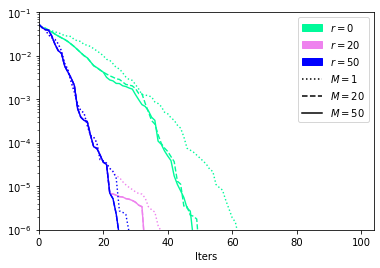

In [86]:
f,ax = plt.subplots()

for alg_idx in range(num_algs):
    ax.semilogy(objfs_running_min[3, alg_idx, :], 
                linewidth=0.7*linewidth, color=colors[alg_idx], linestyle=linestyles[alg_idx])

ax.set_xlim(left=0)
ax.set_ylim([1e-6, 1e-1])
ax.set_xlabel("Iters")
ax.legend(loc="upper right", handles=legend_elements)

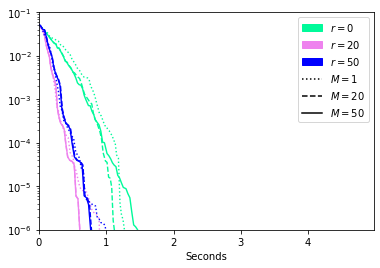

In [88]:
f,ax = plt.subplots()

for alg_idx in range(num_algs):
    ax.semilogy(np.cumsum(runtimes[9, alg_idx, 0:max_num_rounds]), 
                    objfs_running_min[9, alg_idx, :], 
                    linewidth=0.7*linewidth, color=colors[alg_idx], linestyle=linestyles[alg_idx])

ax.set_xlim(left=0)
ax.set_ylim([1e-6, 1e-1])
ax.set_xlabel("Seconds")
ax.legend(loc="upper right", handles=legend_elements)

Text(0, 0.5, 'Gap')

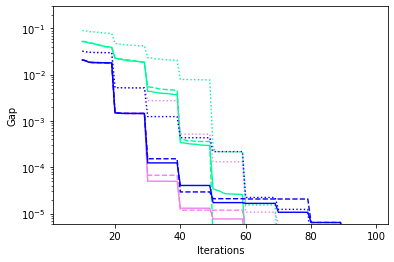

In [89]:
f,ax = plt.subplots()
    
for alg_idx in range(num_algs):
    ax.semilogy(objfs[9, alg_idx, :] - lower_bounds[9, alg_idx, :], linewidth=0.7*linewidth, 
                color=colors[alg_idx], linestyle=linestyles[alg_idx])

# ax.set_xticks([25,50,75,100])
ax.set_xlim(left=1)
ax.set_ylim([6e-6, 3e-1])
ax.set_xlabel("Iterations")
ax.set_ylabel("Gap")

Text(0, 0.5, 'Gap')

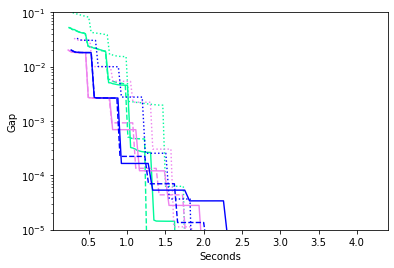

In [53]:
f,ax = plt.subplots()
    
for alg_idx in range(num_algs):
    ax.semilogy(np.cumsum(runtimes[0, alg_idx, 0:max_num_rounds]), 
                objfs[0, alg_idx, :] - lower_bounds[0, alg_idx, :], linewidth=0.7*linewidth, 
                color=colors[alg_idx], linestyle=linestyles[alg_idx])

# ax.set_xticks([25,50,75,100])
# ax.set_xlim(left=1)
ax.set_ylim([1e-5, 1e-1])
ax.set_xlabel("Seconds")
ax.set_ylabel("Gap")

In [90]:
start_idx = 1
rms_res_running_min = np.array(rms_residuals)
for alg_idx in range(num_algs):
    tmp_min = rms_residuals[0, alg_idx, start_idx]
    for i in range(start_idx + 1, max_num_rounds):
        tmp_min = min(rms_residuals[0, alg_idx, i], tmp_min)
        rms_res_running_min[0, alg_idx, i] = tmp_min

Text(0, 0.5, 'RMS residual')

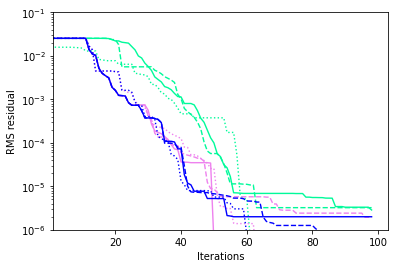

In [91]:
f,ax = plt.subplots()

for alg_idx in range(num_algs):
    ax.semilogy(
                rms_res_running_min[0, alg_idx, start_idx:max_num_rounds], 
                linewidth=0.7*linewidth, color=colors[alg_idx], linestyle=linestyles[alg_idx])

ax.set_xlim(left=1)
ax.set_ylim([1e-6, 1e-1])
ax.set_xlabel("Iterations")
ax.set_ylabel("RMS residual")

for repeat_idx in range(10):
    print(np.min(objfs[repeat_idx, :, :], axis=1))